In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import random
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import os,sys
opj = os.path.join
from tqdm import tqdm
import acd
from copy import deepcopy
from model_GMM import init_specific_model
from losses_GMM import BetaLoss, BtcvaeLoss
from dset_GMM import get_dataloaders
from training import Trainer
from utils import *

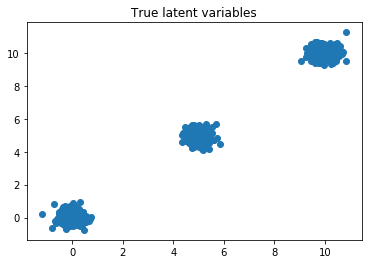

In [2]:
# GET DATALOADERS
train_loader, train_latents = get_dataloaders(n_samples_per_cluster=5000, 
                                              batch_size=100, 
                                              shuffle=True,
                                              return_latents=True)
test_loader, test_latents = get_dataloaders(n_samples_per_cluster=200, 
                                            batch_size=100, 
                                            shuffle=False,
                                            return_latents=True)

# PLOT LATENT VARIABLES
plot_2d_samples(test_latents)
plt.title('True latent variables')
plt.show()

In [3]:
# PREPARES MODEL
model = init_specific_model(orig_dim=10, latent_dim=2)
model = model.to(device)

# TRAINS
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
beta = 1
loss_f = BetaLoss(beta=beta)

trainer = Trainer(model, optimizer, loss_f, device=device, use_residuals=False)
trainer(train_loader, test_loader, epochs=50)

# SAVE MODEL
save_dir = "results"
os.makedirs(save_dir, exist_ok=True)

name = "beta" + str(beta)
torch.save(model.state_dict(), opj(save_dir, name)) 

====> Epoch: 0 Average train loss: 100.5676 (Test set loss: 88.0181)
====> Epoch: 1 Average train loss: 81.3603 (Test set loss: 50.3889)
====> Epoch: 2 Average train loss: 22.8915 (Test set loss: 12.3748)
====> Epoch: 3 Average train loss: 13.8607 (Test set loss: 8.9770)
====> Epoch: 4 Average train loss: 10.7766 (Test set loss: 6.9255)
====> Epoch: 5 Average train loss: 8.1966 (Test set loss: 6.1106)
====> Epoch: 6 Average train loss: 7.2006 (Test set loss: 5.7240)
====> Epoch: 7 Average train loss: 6.7722 (Test set loss: 5.5302)
====> Epoch: 8 Average train loss: 6.5150 (Test set loss: 5.4154)
====> Epoch: 9 Average train loss: 6.3651 (Test set loss: 5.3194)
====> Epoch: 10 Average train loss: 6.2695 (Test set loss: 5.2296)
====> Epoch: 11 Average train loss: 6.1835 (Test set loss: 5.1813)
====> Epoch: 12 Average train loss: 6.0904 (Test set loss: 5.1347)
====> Epoch: 13 Average train loss: 6.0539 (Test set loss: 5.1121)
====> Epoch: 14 Average train loss: 5.9964 (Test set loss: 5.06

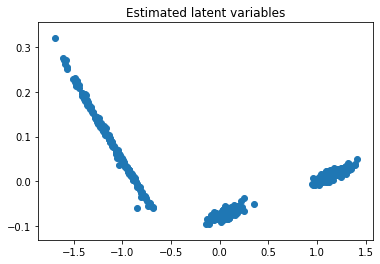

In [4]:
# EVALUATE TEST DATA
data = test_loader.dataset.data.to(device)
recon_data, latent_dist, latent_sample = model(data)

plot_2d_samples(latent_sample.detach().cpu())
plt.title('Estimated latent variables')
plt.show()

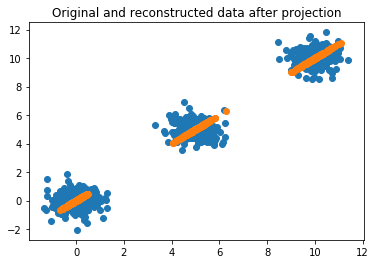

In [5]:
plot_2d_samples(data.detach().cpu()[:,:2])
plot_2d_samples(recon_data.detach().cpu()[:,:2])
plt.title('Original and reconstructed data after projection')
plt.show()

In [6]:
print('Pen: {:.8f}'.format(trainer._comp_latent_pen(latent_sample, data).item()))

Pen: 0.03094366


###  PLOT TRAVERSALS

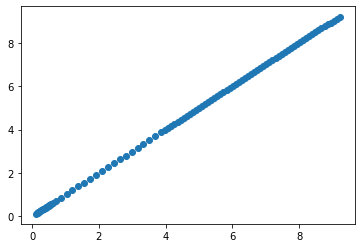

In [7]:
# GET TRAVERSAL
decoded_traversal = traversals(model, data=None)

# PROJECTION to FIRST TWO COORDINATES
decoded_traversal0 = decoded_traversal[:,:2]
plot_2d_samples(decoded_traversal0[:100])

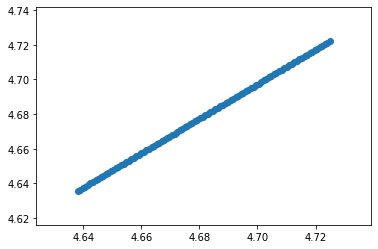

In [8]:
plot_2d_samples(decoded_traversal0[100:])

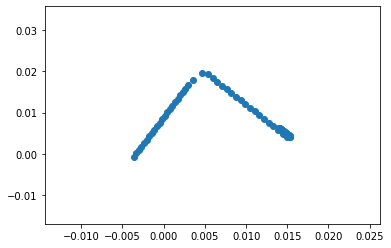

In [9]:
# PROJECTION to SECOND TWO COORDINATES
decoded_traversal1 = decoded_traversal[:,2:4]
plot_2d_samples(decoded_traversal1[:100])

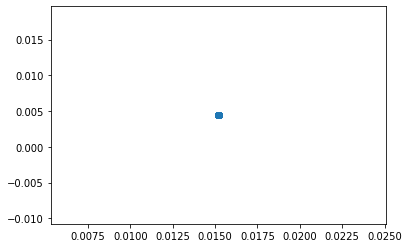

In [10]:
plot_2d_samples(decoded_traversal1[100:])

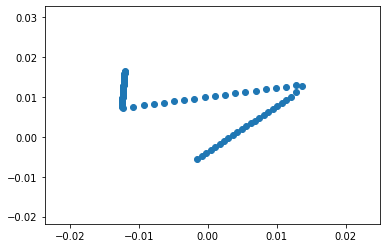

In [11]:
# PROJECTION to THIRD TWO COORDINATES
decoded_traversal2 = decoded_traversal[:,4:6]
plot_2d_samples(decoded_traversal2[:100])

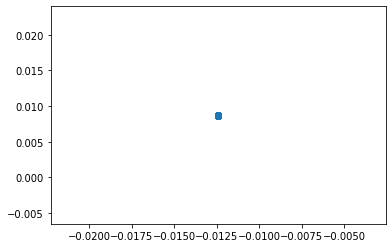

In [12]:
plot_2d_samples(decoded_traversal2[100:])

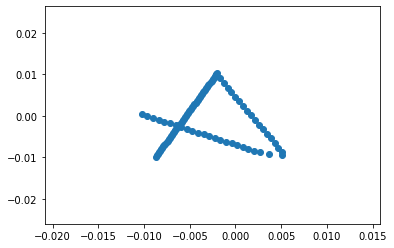

In [13]:
# PROJECTION to FOURTH TWO COORDINATES
decoded_traversal3 = decoded_traversal[:,6:8]
plot_2d_samples(decoded_traversal3[:100])

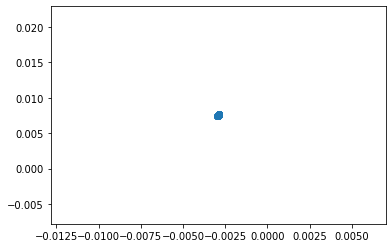

In [14]:
plot_2d_samples(decoded_traversal3[100:])

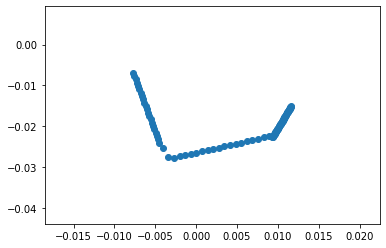

In [15]:
# PROJECTION to FIFTH TWO COORDINATES
decoded_traversal4 = decoded_traversal[:,8:10]
plot_2d_samples(decoded_traversal4[:100])

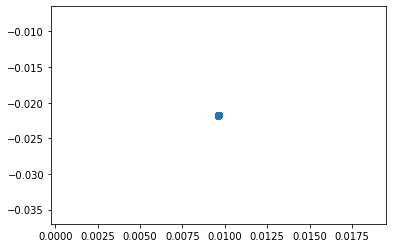

In [16]:
plot_2d_samples(decoded_traversal4[100:])